In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# check for any null values
data.isnull().sum().max()

0

In [6]:
print('No Frauds',round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset=',data['Class'].value_counts()[0],'records')
print('Frauds',round(data['Class'].value_counts()[1]/len(data)*100,2), '% of the dataset=',data['Class'].value_counts()[1],'records')

No Frauds 99.83 % of the dataset= 284315 records
Frauds 0.17 % of the dataset= 492 records


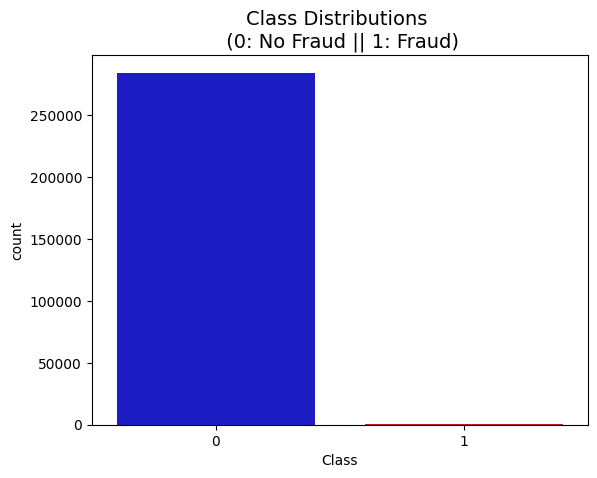

In [7]:
colors = ["#0101DF", "#DF0101"]

sns.countplot( x='Class',data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

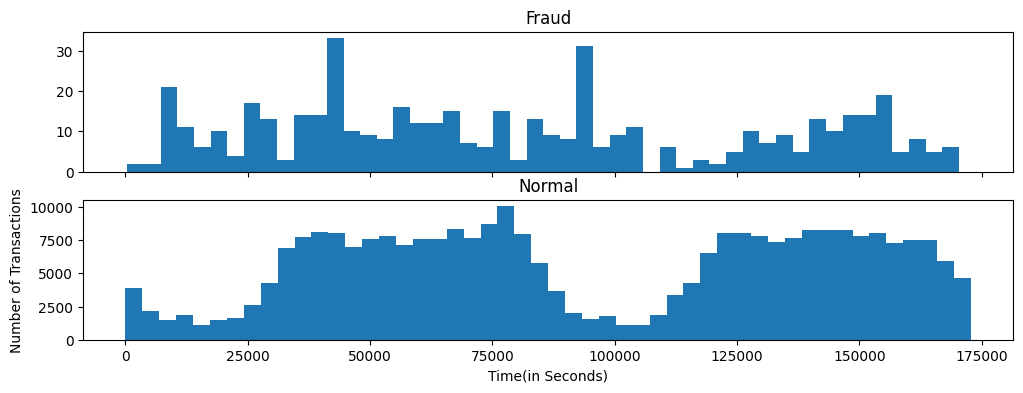

In [8]:
f, (ax1, ax2)=plt.subplots(2,1, sharex=True, figsize=(12,4))

bins=50

ax1.hist(df.Time[df.Class==1], bins=bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class==0], bins=bins)
ax2.set_title('Normal')

plt.xlabel('Time(in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [9]:
#Cylindrical encoding of the seconds attribute
seconds_in_day=24*60*60

df['sin_time']=np.sin(2*np.pi*df.Time/seconds_in_day)
df['cos_time']=np.cos(2*np.pi*df.Time/seconds_in_day)

df.drop('Time', axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

# seperate the input and output class

y=df.Class
x=df.drop('Class', axis=1)

# Setting up traning and testing sets
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.25, random_state=27)


In [11]:
from sklearn.cluster import KMeans

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

## First we model data as-is

In [12]:
# Modeling the data as is using LogisticRegression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='liblinear').fit(X_train, Y_train)

#predicting on testing set
lr_pred=lr.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, lr_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, lr_pred)
print("precision score:",precision)
recall=recall_score(Y_test, lr_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, lr_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, lr_pred)
print("averaage precision score:",average_precision)


f1 score: 0.7443946188340808
precision score: 0.9120879120879121
recall score: 0.6287878787878788
accuracy score: 0.9991994606893064
averaage precision score: 0.5741980064260337


In [13]:
# Modeling the data as is using RandomForest classifier

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier().fit(X_train, Y_train)

#predicting on testing set
rfc_pred=lr.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, rfc_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, rfc_pred)
print("precision score:",precision)
recall=recall_score(Y_test, rfc_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, rfc_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, rfc_pred)
print("averaage precision score:",average_precision)

f1 score: 0.7443946188340808
precision score: 0.9120879120879121
recall score: 0.6287878787878788
accuracy score: 0.9991994606893064
averaage precision score: 0.5741980064260337


In [14]:
# Modeling the data as is using KNeighbors classifier

from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=2).fit(X_train, Y_train)

#predicting on testing set
knc_pred=knc.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, knc_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, knc_pred)
print("precision score:",precision)
recall=recall_score(Y_test, knc_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, knc_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, knc_pred)
print("averaage precision score:",average_precision)

f1 score: 0.7465437788018433
precision score: 0.9529411764705882
recall score: 0.6136363636363636
accuracy score: 0.9992275497879273
averaage precision score: 0.5854756303036011


In [15]:
# Modeling the data as is using SVC

from sklearn import svm

clf=svm.SVC()
clf.fit(X_train,Y_train)

#predicting on testing set
SVM_pred=clf.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, SVM_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, SVM_pred)
print("precision score:",precision)
recall=recall_score(Y_test, SVM_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, SVM_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, SVM_pred)
print("averaage precision score:",average_precision)

f1 score: 0.49729729729729744
precision score: 0.8679245283018868
recall score: 0.3484848484848485
accuracy score: 0.9986938569141316
averaage precision score: 0.3036663789822622


In [16]:
# Modeling the data as is using neural networks

from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(activation='logistic')
mlp.fit(X_train, Y_train)

#predicting on testing set
mlp_pred=mlp.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, mlp_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, mlp_pred)
print("precision score:",precision)
recall=recall_score(Y_test, mlp_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, mlp_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, mlp_pred)
print("averaage precision score:",average_precision)

f1 score: 0.8381742738589212
precision score: 0.926605504587156
recall score: 0.7651515151515151
accuracy score: 0.9994522625768939
averaage precision score: 0.7094289868112195


## Lets try these same classifiers with over sampling the under represented(fraud) data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#Seperate input feature and target
y=df.Class
x=df.drop('Class', axis=1)

# setting up training and testing sets
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25, random_state=27)

#concating our training set together

X=pd.concat([X_train, Y_train], axis=1)

# Seperate minority and majority Classes
not_fraud=X[X.Class==0]
fraud=X[X.Class==1]

#upsample the minority classes
fraud_upsampled=resample(fraud, replace=True, n_samples=len(not_fraud), random_state=27)

#combine majority and upsampled minority
upsampled=pd.concat([not_fraud, fraud_upsampled])

print(upsampled.Class.value_counts())

y_train=upsampled.Class
x_train=upsampled.drop('Class', axis=1)

Class
0    213245
1    213245
Name: count, dtype: int64


In [18]:
# Modeling the data as is using LogisticRegression

from sklearn.linear_model import LogisticRegression

upsampled=LogisticRegression(solver='liblinear').fit(x_train, y_train)

#predicting on testing set
upsampled_pred=upsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, upsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, upsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, upsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, upsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, upsampled_pred)
print("averaage precision score:",average_precision)


f1 score: 0.12520237452779276
precision score: 0.0674026728646136
recall score: 0.8787878787878788
accuracy score: 0.9772337855678211
averaage precision score: 0.059457364700293704


In [19]:
# Modeling the upsampled data as is using RandomForest classifier

from sklearn.ensemble import RandomForestClassifier

upsampled=RandomForestClassifier().fit(x_train, y_train)

#predicting on testing set
upsampled_pred=upsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, upsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, upsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, upsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, upsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, upsampled_pred)
print("averaage precision score:",average_precision)

f1 score: 0.8852459016393442
precision score: 0.9642857142857143
recall score: 0.8181818181818182
accuracy score: 0.9996067526193084
averaage precision score: 0.7892981081444889


In [20]:
# Modeling the upsampled data as is using KNeighbors classifier

from sklearn.neighbors import KNeighborsClassifier

upsampled=KNeighborsClassifier(n_neighbors=2).fit(x_train, y_train)

#predicting on testing set
upsampled_pred=upsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, upsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, upsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, upsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, upsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, upsampled_pred)
print("averaage precision score:",average_precision)

f1 score: 0.8083333333333332
precision score: 0.8981481481481481
recall score: 0.7348484848484849
accuracy score: 0.9993539507317211
averaage precision score: 0.6604943650620035


In [21]:
# Modeling the upsampled data as is using SVC

from sklearn import svm

upsampled=svm.SVC()
upsampled.fit(x_train,y_train)

#predicting on testing set
upsampled_pred=upsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, upsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, upsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, upsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, upsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, upsampled_pred)
print("averaage precision score:",average_precision)

f1 score: 0.21062441752096925
precision score: 0.12008501594048884
recall score: 0.8560606060606061
accuracy score: 0.9881042667340805
averaage precision score: 0.10306689796171026


In [22]:
# Modeling the data as is using neural networks

from sklearn.neural_network import MLPClassifier

upsampled=MLPClassifier(activation='logistic')
upsampled.fit(x_train, y_train)

#predicting on testing set
upsampled_pred=upsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, upsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, upsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, upsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, upsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, upsampled_pred)
print("averaage precision score:",average_precision)

f1 score: 0.6706231454005935
precision score: 0.551219512195122
recall score: 0.8560606060606061
accuracy score: 0.9984410550265442
averaage precision score: 0.4721441561190856


## Lets try under sampling the over-represented negative(non-fraud) class

In [23]:
#still using the same seperated class

#downsample the majority classes
not_fraud_downsampled=resample(not_fraud, replace=True, n_samples=len(fraud), random_state=27)

#combine minority and downsampled majority
downsampled=pd.concat([not_fraud_downsampled, fraud])

print(downsampled.Class.value_counts())

y_train=downsampled.Class
x_train=downsampled.drop('Class', axis=1)

Class
0    360
1    360
Name: count, dtype: int64


In [24]:
# Modeling the data as is using LogisticRegression

from sklearn.linear_model import LogisticRegression

downsampled=LogisticRegression(solver='liblinear').fit(x_train, y_train)

#predicting on testing set
downsampled_pred=downsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, downsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, downsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, downsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, downsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, downsampled_pred)
print("averaage precision score:",average_precision)

f1 score: 0.11464968152866242
precision score: 0.061288632792037716
recall score: 0.8863636363636364
accuracy score: 0.9746214993960843
averaage precision score: 0.054534683668962344


In [25]:
# Modeling the downsampled data as is using RandomForest classifier

from sklearn.ensemble import RandomForestClassifier

downsampled=RandomForestClassifier().fit(x_train, y_train)

#predicting on testing set
downsampled_pred=downsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, downsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, downsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, downsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, downsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, downsampled_pred)
print("averaage precision score:",average_precision)

f1 score: 0.15509103169251517
precision score: 0.0851221317542561
recall score: 0.8712121212121212
accuracy score: 0.982402179714053
averaage precision score: 0.07439819030600013


In [26]:
# Modeling the downsampled data as is using KNeighbors classifier

from sklearn.neighbors import KNeighborsClassifier

downsampled=KNeighborsClassifier(n_neighbors=2).fit(x_train, y_train)

#predicting on testing set
downsampled_pred=upsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, downsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, downsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, downsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, downsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, downsampled_pred)
print("averaage precision score:",average_precision)

f1 score: 0.6706231454005935
precision score: 0.551219512195122
recall score: 0.8560606060606061
accuracy score: 0.9984410550265442
averaage precision score: 0.4721441561190856


In [27]:
# Modeling the upsampled data as is using SVC

from sklearn import svm

downsampled=svm.SVC()
downsampled.fit(x_train,y_train)

#predicting on testing set
downsampled_pred=downsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, downsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, downsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, downsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, downsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, downsampled_pred)
print("averaage precision score:",average_precision)

f1 score: 0.030434782608695653
precision score: 0.015560875512995896
recall score: 0.6893939393939394
accuracy score: 0.9185697030982276
averaage precision score: 0.011303399792049848


In [28]:
# Modeling the data as is using neural networks

from sklearn.neural_network import MLPClassifier

downsampled=MLPClassifier(activation='logistic')
downsampled.fit(x_train, y_train)

#predicting on testing set
downsampled_pred=downsampled.predict(X_test)

#Performance metrics
f1=f1_score(Y_test, downsampled_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, downsampled_pred)
print("precision score:",precision)
recall=recall_score(Y_test, downsampled_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, downsampled_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, downsampled_pred)
print("averaage precision score:",average_precision)

C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


f1 score: 0.11153479504289798
precision score: 0.0595116988809766
recall score: 0.8863636363636364
accuracy score: 0.9738209600853909
averaage precision score: 0.052959674065976355


## Lets try over-sampling the under-represented class using SMOTE(Synthetic Minority Over-sampling Technique) algorithm.

In [31]:
from imblearn.over_sampling import SMOTE

# Seperate input features and target
y=df.Class
x=df.drop('Class', axis=1)

#Setting up testing and training set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sm=SMOTE(random_state=27)
x_train, y_train=sm.fit_resample(X_train, Y_train) 

In [32]:
# Over-sampling the under-represented class using SMOTE algorithm and LogisticRegression
smote=LogisticRegression(solver='liblinear').fit(x_train, y_train)
smote_pred=smote.predict(X_test)

# Performance metrics
f1=f1_score(Y_test, smote_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, smote_pred)
print("precision score:",precision)
recall=recall_score(Y_test, smote_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, smote_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, smote_pred)
print("averaage precision score:",average_precision)


f1 score: 0.15591397849462366
precision score: 0.0855457227138643
recall score: 0.8787878787878788
accuracy score: 0.9823600460661217
averaage precision score: 0.07540125699205948


In [33]:
# Over-sampling the under-represented class using SMOTE algorithm and RandomForest
smote=RandomForestClassifier().fit(x_train,y_train)
smote_pred=smote.predict(X_test)

# Performance metrics
f1=f1_score(Y_test, smote_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, smote_pred)
print("precision score:",precision)
recall=recall_score(Y_test, smote_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, smote_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, smote_pred)
print("averaage precision score:",average_precision)



f1 score: 0.875
precision score: 0.9032258064516129
recall score: 0.8484848484848485
accuracy score: 0.9995505744220669
averaage precision score: 0.76665430252091


In [34]:
# Modeling the upsampled data as is using KNeighborsClassifier

smote=KNeighborsClassifier().fit(x_train, y_train)
smote_pred=smote.predict(X_test)

# Performance metrics
f1=f1_score(Y_test, smote_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, smote_pred)
print("precision score:",precision)
recall=recall_score(Y_test, smote_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, smote_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, smote_pred)
print("averaage precision score:",average_precision)


f1 score: 0.49888641425389757
precision score: 0.35331230283911674
recall score: 0.8484848484848485
accuracy score: 0.9968399764051572
averaage precision score: 0.30006102672848917


In [ ]:
# Modeling the upsampled data as is using SVC

smote=svm.SVC().fit(x_train,y_train)
smote_pred(X_test)

# Performance metrics
f1=f1_score(Y_test, smote_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, smote_pred)
print("precision score:",precision)
recall=recall_score(Y_test, smote_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, smote_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, smote_pred)
print("averaage precision score:",average_precision)

In [ ]:
# Modeling the upsampled data as is using MLPClassifier

smote=MLPClassifier(activation='logistic').fit(x_train, y_train)
smote_pred=smote.predict(X_test)

# Performance metrics
f1=f1_score(Y_test, smote_pred)
print("f1 score:",f1)
precision=precision_score(Y_test, smote_pred)
print("precision score:",precision)
recall=recall_score(Y_test, smote_pred)
print("recall score:",recall)
accuracy=accuracy_score(Y_test, smote_pred)
print("accuracy score:",accuracy)
average_precision=average_precision_score(Y_test, smote_pred)
print("averaage precision score:",average_precision)